In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import warnings
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import display
# from sklearn.model_selection import cross_val_score
# from sklearn import metrics
# from sklearn.metrics import classification_report
# from sklearn.preprocessing import StandardScaler
# from scipy import stats

%matplotlib inline
warnings.filterwarnings('ignore')

In [38]:
pd.options.display.max_columns = None

In [40]:
booksale = pd.read_csv("booksale.csv")
booksale_sg = pd.read_csv("booksale_sg.csv")
booksale_id = pd.read_csv("booksale_id.csv")
booksale_ph = pd.read_csv("booksale_ph.csv")
booksale_th = pd.read_csv("booksale_th.csv")
booksale_vn = pd.read_csv("booksale_vn.csv")

#booksale = booksale.drop_duplicates()
display(booksale.sample(5))
display(booksale_sg.sample(5))
display(booksale_id.sample(5))
display(booksale_ph.head())
display(booksale_th.head())
display(booksale_vn.head())

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount,ori_amount,pub_processed,qty,pub_processed_dt,coupon_code,aff_ref,refno,remark,moderator_id,aff_tracking,pub_share,es_share,normal_price,discount_info
67911,1,68104,2020-05-11 19:08:42,MOLPay,76762.0,269193.0,2845.0,118504.0,MYR,190583,15.3,15.3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,15.3,NaN
46275,1,46468,2019-09-04 15:30:36,MOLPay,47772.0,90583.0,5176.0,44694.0,MYR,307238,12.9,12.9,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,12.9,NaN
84960,1,85155,2020-10-27 20:15:13,MOLPay,101135.0,303345.0,7607.0,118513.0,MYR,302677,9.8,9.8,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,9.8,NaN
95579,1,95774,2021-02-19 14:23:26,MOLPay,112799.0,97561.0,5176.0,41604.0,MYR,668090,9.9,9.9,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,9.9,NaN
70090,1,70283,2020-05-27 18:15:07,MOLPay,80170.0,48505.0,4007.0,31998.0,MYR,409201,12.0,12.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,12.0,NaN


,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount,ori_amount,pub_processed,qty,pub_processed_dt,coupon_code,aff_ref,refno,remark,moderator_id,aff_tracking,pub_share,es_share,normal_price,discount_info
319,4,1381,2016-11-06 12:11:01,paypal,387,79480,4700,47201,SGD,106175,7.67,\N,\N,\N,\N,NaN,\N,\N,\N,\N,\N,0.0,0.0,0.0,0.00
314,4,1376,2016-11-03 07:51:25,paypal,386,75682,5176,44692,SGD,106175,4.99,\N,\N,\N,\N,NaN,\N,\N,\N,\N,\N,0.0,0.0,0.0,0.00
698,4,1760,2020-05-10 14:44:42,PayPal_Express,76568,303274,7260,36763,SGD,397642,8.50,8.50,\N,1,\N,NaN,\N,\N,\N,\N,\N,0.0,0.0,8.5,\N
838,4,1900,2020-06-11 07:50:14,PayPal_Express,81966,79484,4700,35707,SGD,373366,5.00,5.00,\N,1,\N,NaN,\N,\N,\N,\N,\N,0.0,0.0,5.0,\N
204,4,1266,2016-04-25 07:09:21,paypal,327,79458,4700,47182,SGD,12748,6.34,\N,\N,\N,\N,NaN,\N,\N,\N,\N,\N,0.0,0.0,0.0,0.00


,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount,ori_amount,pub_processed,qty,pub_processed_dt,coupon_code,aff_ref,refno,remark,moderator_id,aff_tracking,pub_share,es_share,normal_price,discount_info
159,3,22354,2020-07-07 22:38:25,iPay88,84672,315675,7133,110097,IDR,416420,134206.0,134206.00,\N,1,\N,NaN,\N,\N,\N,\N,\N,0.0,0.0,999.99,\N
191,3,22386,2020-08-10 17:51:27,iPay88,89875,278026,7133,110097,IDR,412239,119156.0,119156.00,\N,1,\N,NaN,\N,\N,\N,\N,\N,0.0,0.0,999.99,\N
500,3,22701,2021-07-31 01:21:04,iPay88,135518,310113,7290,111979,IDR,78220,57484.0,71855.00,\N,1,\N,NaN,\N,\N,\N,\N,\N,0.0,0.0,999.99,\N
519,3,22720,2021-11-02 10:58:33,iPay88,145782,278026,7133,110097,IDR,701733,119156.0,119156.00,\N,1,\N,NaN,\N,\N,\N,\N,\N,0.0,0.0,999.99,\N
352,3,22553,2021-05-04 00:45:55,iPay88,121203,340073,8339,108891,IDR,686930,75000.0,75000.00,\N,1,\N,NaN,\N,\N,\N,\N,\N,0.0,0.0,999.99,\N


,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount,pub_processed,pub_processed_dt,coupon_code,aff_ref,aff_tracking,pub_share,es_share
0,1043,2013-07-23 02:02:41,paypal,137,309,6,1,PHP,17300,41.99,\N,\N,NaN,\N,\N,0.0,0.0


,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount,pub_processed,pub_processed_dt,coupon_code,aff_ref,aff_tracking,pub_share,es_share
0,1043,2013-07-23 02:15:17,paypal,138,224,6,68,THB,17300,30.99,\N,\N,NaN,\N,\N,0.0,0.0


,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount,pub_processed,pub_processed_dt,coupon_code,aff_ref,aff_tracking,pub_share,es_share
0,1043,2013-07-22 09:18:19,paypal,130,267,6,26,USD,17300,1.99,\N,\N,NaN,\N,\N,0.0,0.0
1,1044,2013-07-22 10:02:18,paypal,132,268,6,26,USD,17300,1.99,\N,\N,NaN,\N,\N,0.0,0.0


# <font color=red>Dropping Irrelevant Columns</font>
Columns that can be dropped:
* site_id
* discount_info
* normal_price
* es_share
* pub_share
* aff_tracking
* moderator_id
* remark
* refno
* aff_red
* coupoun_code
* pub_processed_dt
* pub_processed

**ori_amount** is not that important compared to **sale_amount** so the null values they can be dropped

In [41]:
booksale = booksale.drop(['discount_info','normal_price','es_share','pub_share','aff_tracking','moderator_id','remark','refno','aff_ref','coupon_code','pub_processed_dt','pub_processed','ori_amount','qty'], axis = 1)
booksale_sg = booksale_sg.drop(['discount_info','normal_price','es_share','pub_share','aff_tracking','moderator_id','remark','refno','aff_ref','coupon_code','pub_processed_dt','pub_processed','ori_amount','qty'], axis = 1)
booksale_id = booksale_id.drop(['discount_info','normal_price','es_share','pub_share','aff_tracking','moderator_id','remark','refno','aff_ref','coupon_code','pub_processed_dt','pub_processed','ori_amount','qty'], axis = 1)
booksale_ph = booksale_ph.drop(['es_share','pub_share','aff_tracking','aff_ref','coupon_code','pub_processed_dt','pub_processed'], axis = 1)
booksale_th = booksale_th.drop(['es_share','pub_share','aff_tracking','aff_ref','coupon_code','pub_processed_dt','pub_processed'], axis = 1)
booksale_vn = booksale_vn.drop(['es_share','pub_share','aff_tracking','aff_ref','coupon_code','pub_processed_dt','pub_processed'], axis = 1)

In [42]:
display(booksale.sample(5))
display(booksale_sg.sample(5))
display(booksale_id.sample(5))
display(booksale_ph.head())
display(booksale_th.head())
display(booksale_vn.head())

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
78706,1,78901,2020-08-21 16:49:14,MOLPay,92371.0,314477.0,7770.0,121358.0,MYR,296347,6.75
110581,1,110776,2021-07-06 13:39:20,MOLPay,132495.0,342593.0,7290.0,111979.0,MYR,394594,9.00
3143,1,3272,2013-10-18 04:02:09,ipay88,3741.0,35.0,6.0,26.0,NaN,21831,11.99
47845,1,48038,2019-09-28 18:01:44,MOLPay,49997.0,268822.0,457.0,108816.0,MYR,311377,10.99
97554,1,97749,2021-03-19 11:17:14,MOLPay,115031.0,303389.0,7316.0,118546.0,MYR,672370,17.50


,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
395,4,1457,2017-03-01 11:04:41,paypal,421,93883,4700,52712,SGD,106175,6.50
54,4,1114,2014-04-26 12:44:50,paypal,182,14130,56,10855,SGD,24673,4.90
1473,4,2535,2021-07-24 07:41:44,PayPal_Express,134346,271732,20,113,SGD,672813,2.00
1339,4,2401,2021-05-14 11:50:33,PayPal_Express,122874,271640,7133,110097,SGD,305114,13.30
1607,4,2669,2021-11-06 16:57:39,PayPal_Express,146205,18182,20,15700,SGD,700025,2.07


,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
492,3,22693,2021-07-13 22:39:37,iPay88,133241,342593,7290,111979,IDR,78220,31246.0
501,3,22702,2021-07-31 01:21:04,iPay88,135518,2847,23,3054,IDR,78220,39749.0
91,3,22286,2020-03-29 22:29:45,iPay88,66816,79625,2845,28636,IDR,307405,66470.0
420,3,22621,2021-04-08 20:47:13,iPay88,117856,278027,7133,110097,IDR,676311,89558.0
93,3,22288,2020-04-03 20:34:11,iPay88,68475,54240,4700,35709,IDR,206864,97445.0


,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
0,1043,2013-07-23 02:02:41,paypal,137,309,6,1,PHP,17300,41.99


,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
0,1043,2013-07-23 02:15:17,paypal,138,224,6,68,THB,17300,30.99


,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
0,1043,2013-07-22 09:18:19,paypal,130,267,6,26,USD,17300,1.99
1,1044,2013-07-22 10:02:18,paypal,132,268,6,26,USD,17300,1.99


In [43]:
display(booksale.dtypes)

site_id             int64
booksale_id         int64
sale_datetime      object
payment_method     object
payment_id        float64
book_id           float64
publisher_id      float64
author_id         float64
currency           object
user_id             int64
sale_amount       float64
dtype: object

In [44]:
display(booksale_sg.dtypes)
#modify sale_datetime to datetime
#modify payment_id, book_id, publisher_id, author_id to int

site_id             int64
booksale_id         int64
sale_datetime      object
payment_method     object
payment_id          int64
book_id             int64
publisher_id        int64
author_id           int64
currency           object
user_id             int64
sale_amount       float64
dtype: object

In [45]:
display(booksale_id.dtypes)
#modify sale_datetime to datetime

site_id             int64
booksale_id         int64
sale_datetime      object
payment_method     object
payment_id          int64
book_id             int64
publisher_id        int64
author_id           int64
currency           object
user_id             int64
sale_amount       float64
dtype: object

In [46]:
display(booksale_ph.dtypes)

booksale_id         int64
sale_datetime      object
payment_method     object
payment_id          int64
book_id             int64
publisher_id        int64
author_id           int64
currency           object
user_id             int64
sale_amount       float64
dtype: object

In [47]:
display(booksale_th.dtypes)

booksale_id         int64
sale_datetime      object
payment_method     object
payment_id          int64
book_id             int64
publisher_id        int64
author_id           int64
currency           object
user_id             int64
sale_amount       float64
dtype: object

In [48]:
display(booksale_vn.dtypes)

booksale_id         int64
sale_datetime      object
payment_method     object
payment_id          int64
book_id             int64
publisher_id        int64
author_id           int64
currency           object
user_id             int64
sale_amount       float64
dtype: object

Columns that identify an entity by ID like user_id shouldn't have float as their data type. Int data type is more appropirate. The data types for this dataset should be revised. 

In [49]:
booksale.describe()

,site_id,booksale_id,payment_id,book_id,publisher_id,author_id,user_id,sale_amount
count,126888.000000,126888.000000,126409.000000,126887.000000,126870.000000,126869.000000,126888.000000,126886.000000
mean,1.000686,63630.489140,71018.062432,188650.018796,4436.912674,66318.541456,288059.399132,16.657280
std,0.087386,36640.590214,47643.865730,126742.622121,2912.517400,44184.988047,202896.867816,9.325214
min,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,-140.000000
25%,1.000000,31906.750000,23519.000000,58221.000000,2114.000000,33364.000000,115457.000000,10.800000
50%,1.000000,63636.500000,71823.000000,268823.000000,4700.000000,47612.000000,289883.500000,15.000000
75%,1.000000,95360.250000,112495.000000,309126.000000,7262.000000,111002.000000,402902.000000,20.000000
max,12.000000,127082.000000,152172.000000,349119.000000,8407.000000,135532.000000,745365.000000,537.570000


In [50]:
display(booksale.shape)
display(booksale_sg.shape)
display(booksale_id.shape)
display(booksale_ph.shape)
display(booksale_th.shape)
display(booksale_vn.shape)

(126888, 11)

(1661, 11)

(551, 11)

(1, 10)

(1, 10)

(2, 10)

# <font color=red>Dropping & Filling Up Null Values</font>

In [51]:
display(booksale.isnull().sum().sum())
display(booksale_sg.isnull().sum().sum())
display(booksale_id.isnull().sum().sum())
display(booksale_ph.isnull().sum().sum())
display(booksale_th.isnull().sum().sum())
display(booksale_vn.isnull().sum().sum())

15113

0

0

0

0

0

In [52]:
column_with_nan = booksale.columns[booksale.isnull().any()]

for column in column_with_nan:
    print(column, booksale[column].isnull().sum())

sale_datetime 1
payment_method 4
payment_id 479
book_id 1
publisher_id 18
author_id 19
currency 14589
sale_amount 2


Rows containing null values that can be dropped identified by their column names:
* sale_datetime
* payment_method
* payment_id
* book_id
* publisher_id
* author_id
* sale_amount

Justification: Most of these values cannot be estimated and replaced easily for example by calculating the average value of a particular column. Values for payment_id, book_id etc. cannot just be simply assigned because they need to be unique. It's simpler to just drop the rows containing null values as they're not that many. 837 rows in total will be dropped which count for only 0.66% from the total records from this dataset. The percentage is very small to to give any significant impact to the analysis outcome that will be carried out later.

In [53]:
#doppping rows containing null values

booksale = booksale.dropna(subset=['sale_datetime'])
booksale = booksale.dropna(subset=['payment_method'])
booksale = booksale.dropna(subset=['payment_id'])
booksale = booksale.dropna(subset=['book_id'])
booksale = booksale.dropna(subset=['publisher_id'])
booksale = booksale.dropna(subset=['author_id'])
booksale = booksale.dropna(subset=['sale_amount'])

In [54]:
#final checking of null values

booksale.isnull().sum()

site_id               0
booksale_id           0
sale_datetime         0
payment_method        0
payment_id            0
book_id               0
publisher_id          0
author_id             0
currency          14248
user_id               0
sale_amount           0
dtype: int64

Values for **currency** and **qty** can be replaced as evident from the dataset, they're constant.

In [55]:
booksale["currency"].fillna("MYR", inplace = True)
#booksale["qty"].fillna("1.0", inplace = True)

In [56]:
display(booksale.sample(10))
booksale.shape

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
113399,1,113594,2021-08-03 06:44:32,molpay,136021.0,312407.0,4542.0,3073.0,MYR,709724,4.33
99826,1,100021,2021-04-11 00:10:10,MOLPay,118152.0,338148.0,7262.0,40474.0,MYR,190583,18.00
124961,1,125156,2021-12-08 14:16:31,razer,149908.0,325935.0,23.0,126094.0,MYR,377801,12.75
109956,1,110151,2021-06-30 14:05:29,MOLPay,131713.0,340827.0,7297.0,47200.0,MYR,312214,23.00
4139,1,4276,2014-02-19 04:17:16,ipay88,4880.0,1709.0,23.0,2602.0,MYR,23584,10.80
97590,1,97785,2021-03-19 20:14:56,MOLPay,115070.0,303391.0,7316.0,118546.0,MYR,307425,17.50
113402,1,113597,2021-08-03 07:23:55,molpay,136023.0,41423.0,2845.0,28631.0,MYR,453803,9.18
84109,1,84304,2020-10-25 19:47:46,MOLPay,99875.0,314477.0,7770.0,121358.0,MYR,436828,6.75
10478,1,10646,2015-09-19 08:35:52,molpay,10026.0,46781.0,1762.0,31022.0,MYR,48849,9.00
83515,1,83710,2020-10-20 21:40:55,MOLPay,99130.0,325152.0,3928.0,125786.0,MYR,435167,9.00


(126385, 11)

In [57]:
booksale.shape

(126385, 11)

# <font color=red>Data Transformation</font>

#### "Not sure since I join sometime on 2013 if I am not mistaken. At that time, I was not privy with the booksales. My guess is those are some data that we tried to sell via the newly integrated iPay88."

Based on my observation and data exploration, there are zero and negative values for sales which should be illogical. So these rows should be dropped. Only for booksale dataset as it's not the case for other datasets

<AxesSubplot:xlabel='sale_amount'>

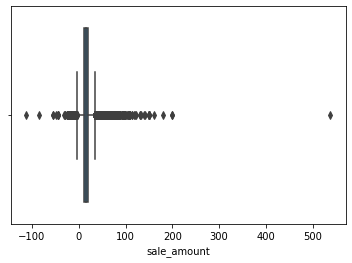

In [58]:
sns.boxplot(booksale['sale_amount'])

<AxesSubplot:xlabel='sale_amount'>

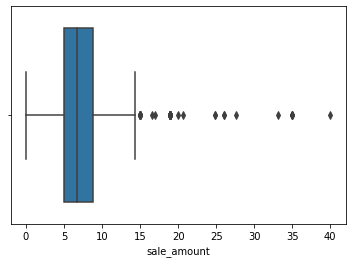

In [59]:
sns.boxplot(booksale_sg['sale_amount'])

<AxesSubplot:xlabel='sale_amount'>

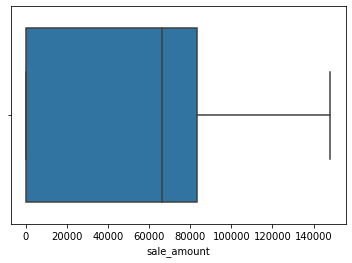

In [60]:
sns.boxplot(booksale_id['sale_amount'])

<AxesSubplot:xlabel='sale_amount'>

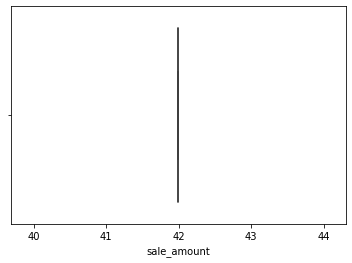

In [61]:
sns.boxplot(booksale_ph['sale_amount'])

<AxesSubplot:xlabel='sale_amount'>

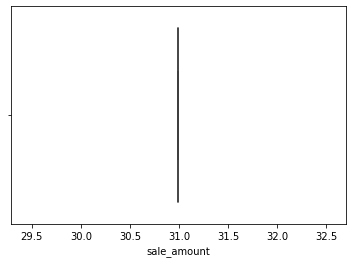

In [62]:
sns.boxplot(booksale_th['sale_amount'])

<AxesSubplot:xlabel='sale_amount'>

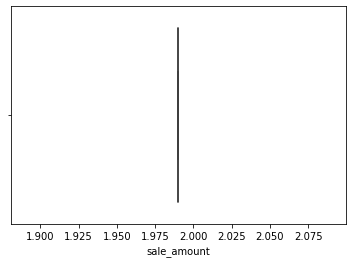

In [63]:
sns.boxplot(booksale_vn['sale_amount'])

In [64]:
booksale.loc[booksale['sale_amount'] >= 500]

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
123297,1,123492,2021-11-18 08:35:12,Paypal_express,147827.0,276514.0,26.0,111848.0,MYR,740286,537.57


In [65]:
booksale.loc[booksale['sale_amount'] <= 0]

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
115,1,143,2011-12-01 20:50:25,webcash,169.0,52.0,20.0,113.0,MYR,238,-9.00
116,1,144,2011-12-27 09:22:21,webcash,265.0,215.0,23.0,166.0,MYR,381,-8.99
117,1,145,2011-12-27 09:22:21,webcash,265.0,296.0,23.0,189.0,MYR,381,-11.99
118,1,146,2011-12-27 09:22:21,webcash,265.0,289.0,23.0,189.0,MYR,381,-11.99
119,1,147,2011-12-27 09:22:21,webcash,265.0,207.0,23.0,166.0,MYR,381,-8.99
...,...,...,...,...,...,...,...,...,...,...,...
125558,1,125753,2021-12-11 10:56:23,razer,150583.0,326309.0,7985.0,126261.0,MYR,218624,0.00
125559,1,125754,2021-12-11 10:56:23,razer,150583.0,326308.0,7985.0,123853.0,MYR,218624,0.00
125560,1,125755,2021-12-11 10:56:23,razer,150583.0,330243.0,7985.0,127914.0,MYR,218624,0.00
125562,1,125757,2021-12-11 10:56:23,razer,150583.0,326524.0,7133.0,110097.0,MYR,218624,0.00


In [66]:
booksale_sg.loc[booksale_sg['sale_amount'] <= 0]

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
532,4,1594,2020-03-01 22:54:58,PayPal_Express,62715,278693,7482,47208,SGD,216127,0.0
563,4,1625,2020-03-27 10:53:29,PayPal_Express,65755,203279,5176,94807,SGD,373366,0.0


In [67]:
booksale_id.loc[booksale_id['sale_amount'] <= 0]

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
100,3,22295,2020-04-15 12:20:27,iPay88,71881,278025,7090,44673,IDR,394514,0.0
101,3,22296,2020-04-15 12:31:02,iPay88,71885,272110,7090,44673,IDR,394514,0.0
102,3,22297,2020-04-15 12:31:02,iPay88,71885,266163,2845,29647,IDR,394514,0.0
103,3,22298,2020-04-15 12:36:14,iPay88,71890,278419,7290,111979,IDR,394514,0.0
104,3,22299,2020-04-15 18:39:46,iPay88,71996,271749,2845,110152,IDR,394514,0.0
...,...,...,...,...,...,...,...,...,...,...,...
531,3,22732,2021-03-12 22:06:13,iPay88,114420,338141,7262,40474,IDR,394514,0.0
532,3,22733,2021-03-12 22:06:13,iPay88,114420,338135,7262,37474,IDR,394514,0.0
533,3,22734,2021-03-12 22:06:13,iPay88,114420,338133,7262,130722,IDR,394514,0.0
534,3,22735,2021-03-12 22:06:13,iPay88,114420,338132,7262,118503,IDR,394514,0.0


In [68]:
booksale.drop(booksale[booksale['sale_amount'] <= 0].index, inplace = True)

display(booksale.sample(10))
booksale.shape

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
10387,1,10555,2015-09-11 15:20:05,molpay,9817.0,48631.0,23.0,13559.0,MYR,58891,18.70
122212,1,122407,2021-11-09 21:01:39,razer,146630.0,81386.0,5176.0,52412.0,MYR,739140,10.90
12873,1,13048,2016-02-21 14:20:15,molpay,14737.0,64545.0,5385.0,40612.0,MYR,24723,16.10
11929,1,12100,2015-12-26 06:41:50,molpay,13010.0,1666.0,72.0,203.0,MYR,61300,7.99
97698,1,97893,2021-03-20 23:57:08,MOLPay,115189.0,329577.0,7532.0,109116.0,MYR,328940,13.50
48465,1,48658,2019-10-06 12:57:03,MOLPay,50926.0,271745.0,2845.0,110152.0,MYR,209250,14.40
119010,1,119205,2021-10-08 22:40:54,razer,142342.0,330243.0,7985.0,127914.0,MYR,320500,16.00
11024,1,11193,2015-10-15 05:37:02,molpay,10987.0,51006.0,3451.0,33436.0,MYR,31126,12.00
23757,1,23940,2017-09-07 22:17:16,MOLPay,11589.0,54240.0,4700.0,35709.0,MYR,78220,22.00
65167,1,65360,2020-04-22 23:05:42,MOLPay,73594.0,308667.0,2845.0,47299.0,MYR,312451,14.40


(125904, 11)

In [69]:
booksale_sg.drop(booksale_sg[booksale_sg['sale_amount'] <= 0].index, inplace = True)

display(booksale_sg.sample(10))
booksale_sg.shape

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
572,4,1634,2020-03-28 10:17:12,PayPal_Express,66196,271750,2845,110158,SGD,332538,7.80
138,4,1200,2015-09-21 02:56:31,paypal,274,56260,2845,36761,SGD,62837,5.30
631,4,1693,2020-04-21 23:04:23,PayPal_Express,73355,97206,5327,27351,SGD,392903,3.73
783,4,1845,2020-05-26 12:04:13,PayPal_Express,79934,72989,5176,40726,SGD,270550,5.51
667,4,1729,2020-05-03 13:03:31,PayPal_Express,75297,18125,38,15648,SGD,403812,1.00
511,4,1573,2020-02-06 12:03:46,PayPal_Express,60758,81571,5176,41611,SGD,270550,4.45
679,4,1741,2020-05-07 17:35:11,PayPal_Express,76047,95897,5176,52758,SGD,274083,6.89
1103,4,2165,2020-10-14 19:12:41,PayPal_Express,97954,317729,7947,124381,SGD,314736,3.28
596,4,1658,2020-04-13 04:34:20,PayPal_Express,71335,12361,23,11140,SGD,393167,5.51
1302,4,2364,2021-04-26 00:28:03,PayPal_Express,119970,326309,7985,126261,SGD,308431,15.00


(1659, 11)

In [70]:
booksale_id.drop(booksale_id[booksale_id['sale_amount'] <= 0].index, inplace = True)

display(booksale_id.sample(10))
booksale_id.shape

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
462,3,22663,2021-06-21 13:43:41,iPay88,130405,278026,7133,110097,IDR,701709,119156.00
75,3,22270,2020-03-11 16:00:31,Eghl,63581,303389,7316,118546,IDR,307405,83232.00
25,3,1066,2014-12-05 09:35:27,paypal,213,12945,26,3894,USD,39885,2.99
435,3,22636,2021-05-11 06:34:45,iPay88,122285,41429,2845,28636,IDR,687705,50517.00
386,3,22587,2021-05-21 23:07:18,iPay88,125290,340073,8339,108891,IDR,693253,75000.00
259,3,22454,2020-11-22 08:19:25,iPay88,104398,325564,7290,111979,IDR,394514,31967.00
318,3,22513,2021-02-21 08:00:16,iPay88,112952,303287,2845,118494,IDR,663104,55245.00
62,3,22257,2017-06-24 16:21:43,PayPal_Express,9479,94273,1226,56886,Rp,162619,40.00
307,3,22502,2021-02-11 21:53:02,iPay88,112108,328744,7310,52758,IDR,78220,94224.00
478,3,22679,2021-07-01 16:35:09,iPay88,131878,340073,8339,131687,IDR,703990,75000.00


(474, 11)

#### "At one point, If I remember correctly, we are trying to consolidate all sales in one table but it didn't pan out ok, thus the birth of booksale_sg and booksale_id."

This dataset supposedly should only contain book sales pegged to MYR. Having SGD and USD as the currencies in sales are should be treated as outliers. Rows containing these values should be dropped as we cannot assume that theese sales were done in MYR.

In [71]:
booksale.currency.value_counts()

MYR    125902
SGD         1
USD         1
Name: currency, dtype: int64

In [72]:
booksale = booksale[booksale["currency"].str.contains("MYR")==True]

In [73]:
booksale.shape

(125902, 11)

Value of payment_method = "Devs" are testing done by Company-X devs. Rows containing this value should be dropped.

In [74]:
booksale.payment_method.unique()

array(['webcash', 'ipay88', 'molpay', 'MOLPay', 'PayPal_Express', 'Devs',
       'Paypal_express', 'razer', 'iPay88'], dtype=object)

In [75]:
booksale = booksale[booksale["payment_method"].str.contains("Devs")==False]

In [76]:
booksale.payment_method.value_counts()

MOLPay            94959
razer             12052
molpay            11855
ipay88             3660
PayPal_Express     2095
webcash            1064
Paypal_express      202
iPay88                8
Name: payment_method, dtype: int64

In [77]:
booksale_sg.payment_method.value_counts()

PayPal_Express    1172
paypal             487
Name: payment_method, dtype: int64

In [78]:
booksale_id.payment_method.value_counts()

iPay88            395
paypal             59
PayPal_Express     13
Eghl                7
Name: payment_method, dtype: int64

In [79]:
booksale_ph.payment_method.value_counts()

paypal    1
Name: payment_method, dtype: int64

In [80]:
booksale_th.payment_method.value_counts()

paypal    1
Name: payment_method, dtype: int64

In [81]:
booksale_vn.payment_method.value_counts()

paypal    2
Name: payment_method, dtype: int64

The number of unique values for payment_method column should be fewer because values such as PayPal_Express and Paypal_express are expressing the same method of payment.

In [82]:
booksale['payment_method'] = booksale['payment_method'].replace(['ipay88'],'iPay88')
booksale['payment_method'] = booksale['payment_method'].replace(['molpay'],'MOLPay')
booksale['payment_method'] = booksale['payment_method'].replace(['PayPal_Express'],'PayPal')
booksale['payment_method'] = booksale['payment_method'].replace(['Paypal_express'],'PayPal')
booksale['payment_method'] = booksale['payment_method'].replace(['razer'],'Razer')
booksale['payment_method'] = booksale['payment_method'].replace(['webcash'],'Webcash')

booksale_sg['payment_method'] = booksale_sg['payment_method'].replace(['PayPal_Express'],'PayPal')
booksale_sg['payment_method'] = booksale_sg['payment_method'].replace(['paypal'],'PayPal')


booksale_id['payment_method'] = booksale_id['payment_method'].replace(['ipay88'],'iPay88')
booksale_id['payment_method'] = booksale_id['payment_method'].replace(['PayPal_Express'],'PayPal')
booksale_id['payment_method'] = booksale_id['payment_method'].replace(['paypal'],'PayPal')

booksale_ph['payment_method'] = booksale_ph['payment_method'].replace(['paypal'],'PayPal')

booksale_th['payment_method'] = booksale_th['payment_method'].replace(['paypal'],'PayPal')

booksale_vn['payment_method'] = booksale_vn['payment_method'].replace(['paypal'],'PayPal')

In [139]:
display(booksale.payment_method.value_counts())
display(booksale_sg.payment_method.value_counts())
display(booksale_id.payment_method.value_counts())

MOLPay     106814
Razer       12052
iPay88       3668
PayPal       2297
Webcash      1064
Name: payment_method, dtype: int64

PayPal    1659
Name: payment_method, dtype: int64

iPay88    395
PayPal     72
Eghl        7
Name: payment_method, dtype: int64

In [142]:
booksale.payment_method.value_counts()

MOLPay     106814
Razer       12052
iPay88       3668
PayPal       2297
Webcash      1064
Name: payment_method, dtype: int64

The data type for some of the columns should be changed. For example, columns that store ID values shouldn't have float as their data type as int is more appropriate.

In [84]:
booksale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125895 entries, 0 to 126887
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   site_id         125895 non-null  int64  
 1   booksale_id     125895 non-null  int64  
 2   sale_datetime   125895 non-null  object 
 3   payment_method  125895 non-null  object 
 4   payment_id      125895 non-null  float64
 5   book_id         125895 non-null  float64
 6   publisher_id    125895 non-null  float64
 7   author_id       125895 non-null  float64
 8   currency        125895 non-null  object 
 9   user_id         125895 non-null  int64  
 10  sale_amount     125895 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 11.5+ MB


In [85]:
booksale_sg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 1660
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   site_id         1659 non-null   int64  
 1   booksale_id     1659 non-null   int64  
 2   sale_datetime   1659 non-null   object 
 3   payment_method  1659 non-null   object 
 4   payment_id      1659 non-null   int64  
 5   book_id         1659 non-null   int64  
 6   publisher_id    1659 non-null   int64  
 7   author_id       1659 non-null   int64  
 8   currency        1659 non-null   object 
 9   user_id         1659 non-null   int64  
 10  sale_amount     1659 non-null   float64
dtypes: float64(1), int64(7), object(3)
memory usage: 155.5+ KB


In [86]:
booksale_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 550
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   site_id         474 non-null    int64  
 1   booksale_id     474 non-null    int64  
 2   sale_datetime   474 non-null    object 
 3   payment_method  474 non-null    object 
 4   payment_id      474 non-null    int64  
 5   book_id         474 non-null    int64  
 6   publisher_id    474 non-null    int64  
 7   author_id       474 non-null    int64  
 8   currency        474 non-null    object 
 9   user_id         474 non-null    int64  
 10  sale_amount     474 non-null    float64
dtypes: float64(1), int64(7), object(3)
memory usage: 44.4+ KB


In [87]:
convert_dict_1 = {
    'payment_id' : int,
    'book_id' : int,
    'publisher_id' : int,
    'author_id' : int
}

booksale = booksale.astype(convert_dict_1)

booksale["sale_datetime"] = pd.to_datetime(booksale["sale_datetime"], errors='coerce')

In [88]:
booksale_sg["sale_datetime"]= pd.to_datetime(booksale_sg["sale_datetime"], errors='coerce')

In [89]:
booksale_id["sale_datetime"]= pd.to_datetime(booksale_id["sale_datetime"], errors='coerce')

In [90]:
booksale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125895 entries, 0 to 126887
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   site_id         125895 non-null  int64         
 1   booksale_id     125895 non-null  int64         
 2   sale_datetime   125895 non-null  datetime64[ns]
 3   payment_method  125895 non-null  object        
 4   payment_id      125895 non-null  int32         
 5   book_id         125895 non-null  int32         
 6   publisher_id    125895 non-null  int32         
 7   author_id       125895 non-null  int32         
 8   currency        125895 non-null  object        
 9   user_id         125895 non-null  int64         
 10  sale_amount     125895 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(4), int64(3), object(2)
memory usage: 9.6+ MB


In [91]:
booksale_sg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 1660
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   site_id         1659 non-null   int64         
 1   booksale_id     1659 non-null   int64         
 2   sale_datetime   1659 non-null   datetime64[ns]
 3   payment_method  1659 non-null   object        
 4   payment_id      1659 non-null   int64         
 5   book_id         1659 non-null   int64         
 6   publisher_id    1659 non-null   int64         
 7   author_id       1659 non-null   int64         
 8   currency        1659 non-null   object        
 9   user_id         1659 non-null   int64         
 10  sale_amount     1659 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 155.5+ KB


In [92]:
booksale_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 550
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   site_id         474 non-null    int64         
 1   booksale_id     474 non-null    int64         
 2   sale_datetime   474 non-null    datetime64[ns]
 3   payment_method  474 non-null    object        
 4   payment_id      474 non-null    int64         
 5   book_id         474 non-null    int64         
 6   publisher_id    474 non-null    int64         
 7   author_id       474 non-null    int64         
 8   currency        474 non-null    object        
 9   user_id         474 non-null    int64         
 10  sale_amount     474 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 44.4+ KB


In [93]:
#create new site_id column and assigned 2 as the value
booksale_th['site_id'] = 2 
cols = booksale_th.columns.tolist()
cols = cols[-1:] + cols[:-1]
booksale_th = booksale_th[cols]
booksale_th.head()

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
0,2,1043,2013-07-23 02:15:17,PayPal,138,224,6,68,THB,17300,30.99


In [94]:
#create new site_id column and assigned 5 as the value
booksale_ph['site_id'] = 5
cols = booksale_ph.columns.tolist()
cols = cols[-1:] + cols[:-1]
booksale_ph = booksale_ph[cols]
booksale_ph.head()

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
0,5,1043,2013-07-23 02:02:41,PayPal,137,309,6,1,PHP,17300,41.99


In [95]:
#create new site_id column and assigned 6 as the value
booksale_vn['site_id'] = 6 
cols = booksale_vn.columns.tolist()
cols = cols[-1:] + cols[:-1]
booksale_vn = booksale_vn[cols]
booksale_vn.head()

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
0,6,1043,2013-07-22 09:18:19,PayPal,130,267,6,26,USD,17300,1.99
1,6,1044,2013-07-22 10:02:18,PayPal,132,268,6,26,USD,17300,1.99


In [96]:
display(booksale.sample(5))
display(booksale_th.head())
display(booksale_id.sample(5))
display(booksale_sg.sample(5))
display(booksale_ph.head())
display(booksale_vn.head())

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
113288,1,113483,2021-08-02 09:06:12,MOLPay,135876,344018,8358,133663,MYR,709492,27.0
3289,1,3418,2013-10-30 11:30:51,iPay88,3965,9959,109,9084,MYR,22108,5.0
100914,1,101109,2021-04-23 11:13:48,MOLPay,119524,312166,7532,109116,MYR,391652,12.0
121793,1,121988,2021-11-05 21:02:15,Razer,146131,47465,2845,31441,MYR,406819,12.5
19638,1,19820,2017-02-22 13:13:39,MOLPay,5426,75658,4699,35978,MYR,22710,24.0


,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
0,2,1043,2013-07-23 02:15:17,PayPal,138,224,6,68,THB,17300,30.99


,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
35,3,1076,2015-04-24 15:08:22,PayPal,239,13492,596,11718,USD,53096,2.33
504,3,22705,2021-08-02 20:15:33,iPay88,135955,340073,8339,131687,IDR,709637,75000.00
527,3,22728,2021-03-12 22:06:13,iPay88,114420,337925,7562,107831,IDR,394514,100304.00
42,3,1083,2016-01-18 13:33:56,PayPal,291,17178,457,14681,USD,70977,4.99
30,3,1071,2015-04-05 12:15:34,PayPal,233,48913,26,22730,USD,51650,7.99


,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
264,4,1326,2016-08-27 16:24:08,PayPal,370,79970,5176,43798,SGD,60251,3.99
540,4,1602,2020-03-10 04:50:39,PayPal,63478,269529,7083,109176,SGD,47256,4.70
551,4,1613,2020-03-22 22:54:11,PayPal,64912,41424,2845,28632,SGD,270550,6.90
357,4,1419,2017-01-26 02:30:48,PayPal,402,41421,2845,28629,SGD,12748,4.99
1533,4,2595,2021-08-27 22:50:38,PayPal,138799,344951,7562,60035,SGD,394220,6.41


,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
0,5,1043,2013-07-23 02:02:41,PayPal,137,309,6,1,PHP,17300,41.99


,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
0,6,1043,2013-07-22 09:18:19,PayPal,130,267,6,26,USD,17300,1.99
1,6,1044,2013-07-22 10:02:18,PayPal,132,268,6,26,USD,17300,1.99


In [97]:
display(booksale.shape)
display(booksale_sg.shape)
display(booksale_id.shape)
display(booksale_ph.shape)
display(booksale_th.shape)
display(booksale_vn.shape)

(125895, 11)

(1659, 11)

(474, 11)

(1, 11)

(1, 11)

(2, 11)

In [98]:
df = pd.concat([booksale, booksale_th, booksale_id, booksale_sg, booksale_ph, booksale_vn], axis = 0, ignore_index=True)
display(df.head())
display(df.tail())
display(df.shape)

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
0,1,1,2011-08-01 14:08:54,Webcash,30,50,2,35,MYR,40,1.0
1,1,2,2011-08-08 13:33:18,Webcash,49,121,14,81,MYR,42,1.0
2,1,3,2011-08-08 13:33:18,Webcash,49,102,9,61,MYR,42,1.0
3,1,4,2011-08-08 15:54:38,Webcash,50,124,14,84,MYR,50,1.0
4,1,5,2011-08-08 15:54:38,Webcash,50,102,9,61,MYR,50,1.0


,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount
128027,4,2721,2021-12-14 00:15:26,PayPal,150985,346946,8010,47218,SGD,47256,8.07
128028,4,2722,2021-12-14 00:15:26,PayPal,150985,90601,5176,41604,SGD,47256,5.51
128029,5,1043,2013-07-23 02:02:41,PayPal,137,309,6,1,PHP,17300,41.99
128030,6,1043,2013-07-22 09:18:19,PayPal,130,267,6,26,USD,17300,1.99
128031,6,1044,2013-07-22 10:02:18,PayPal,132,268,6,26,USD,17300,1.99


(128032, 11)

In [99]:
#df.to_csv(r'C:\Users\Bukhari\Desktop\CDS590 Project\Relevant Data\df.csv')

In [100]:
books = pd.read_csv("books.csv")
display(books.sample(5))

,book_id,date_added,modified_date,release_date,title,author_id,tax_rate,tax_type,retail_price,ebook_price,sgd_price,sgd_ori_price,bnd_price,bnd_ori_price,usd_price,usd_ori_price,idr_price,idr_ori_price,thb_price,thb_ori_price,php_price,php_ori_price,vnd_price,vnd_ori_price,discount,isbn,publisher_id,synopsis,category_id,language,content_type,cover_img,epub_source,epub_source_cloudreader,preview_source,filename,filesize,mimetype,offshelf,opt_out,book_key,tag,imprint,reader,protection,format,display_publisher,display_pub_id,content_language,bisac_code,bisac_text,bisac_top_text,sales_region,no_sales_region,onix_ref,onix_batchname,demarque_book_id,s3_cover,s3_epub,wait_req_change,lib_contract,lib_perpetual,lib_contract_myr,lib_contract_usd,lib_perpetual_myr,lib_perpetual_usd,epub_type,agg_ibook,agg_kindle,agg_google,agg_kobo,agg_ibook_url,agg_kindle_url,agg_google_url,agg_kobo_url,agg_request_change,discount_campaign,estudio_id,multicat,remarks,share
267120,268574,2018-11-01 21:21:00,2020-09-06 02:23:04,2020-09-06 00:00:00,Christmas At Prescott Inn,103512,0.0,\N,29.12,\N,9.50,\N,10.96,\N,6.99,\N,101597.55,\N,217.45,\N,338.06,\N,161993.25,\N,\N,9781489275301,6930,<p><strong>She’s back in his life... </strong>...,24,English,English,hcau/9781489275301,hcau/9781489275301.epub,NaN,NaN,9781489275301.epub,959228,application/epub+zip,N,N,8hIQ5ow70QrwCYoU,"christmas romance,clean romance,contemporary r...",Mills & Boon Forever Romance,e-sentral,DRM,epub,\N,\N,\N,FIC027020,\N,\N,AS AU CK CN CX EH FJ FM HK ID JP KH KP KR LA M...,0,hcau/20200905,hcau/20200905/Metadata_Only_HarperCollins_Aust...,NaN,hcau/9781489275301,hcau/9781489275301.epub,N,no,no,\N,\N,\N,\N,text,N,N,N,N,\N,\N,\N,\N,N,\N,\N,"[{""category_id"":24,""name"":""Romantik"",""name_eng...",\N,N
18155,19155,2014-03-31 06:37:03,2014-03-30 22:37:01,2014-03-30 00:00:00,МАРШ ЭККЛЕЗИАСТОВ,16405,0.0,\N,6.99,\N,2.75,0.00,2.75,0.00,1.99,0.00,26455.06,0.00,58.99,\N,76.99,\N,37089.99,\N,0.00,9783957031747,1226,При попытке спастись от чудовищной катастрофы...,16,rus,English,img/xinxii/9783957031747-original.jpg,/home/esen1/epub/xinxii/9783957031747.epub,\N,\N,9783957031747.epub,1968945,application/epub+zip,N,N,A0698F75B5A9447A,non,\N,e-sentral,DRM,epub,xinxii,NaN,Oth,NaN,NaN,NaN,world,NaN,9783957031747,xinxii-20140131xinxii-,NaN,xinxii/9783957031747,xinxii/9783957031747.epub,N,no,no,\N,\N,\N,\N,text,N,N,N,N,\N,\N,\N,\N,N,NaN,\N,"[{""category_id"":""16"",""name"":""Novel Am"",""name_e...",\N,N
315025,316544,2020-07-30 18:56:18,2020-07-30 10:56:18,2020-07-28 00:00:00,Vatra nepoznatog porekla,123867,0.0,\N,21.17,\N,6.85,\N,7.00,\N,4.99,\N,72365.19,\N,156.76,\N,244.84,\N,115668.20,\N,\N,6610000267736,4542,<p>Palp triler koji prati pet unikatnih likova...,16,srp,English,publishdrive/6610000267736,publishdrive/6610000267736.epub,NaN,NaN,6610000267736.epub,1664771,application/epub+zip,N,N,P08Y1xoEXpzUIAtu,"fiction,mystery,detective,hard-boile",Walter Duke,e-sentral,DRM,epub,\N,\N,\N,FIC022010,\N,\N,WORLD,0,publishdrive/publishdrive/20200730_6610000267736,publishdrive/publishdrive/20200730_66100002677...,NaN,publishdrive/6610000267736,publishdrive/6610000267736.epub,N,no,no,\N,\N,\N,\N,text,N,N,N,N,\N,\N,\N,\N,N,\N,\N,"[{""category_id"":16,""name"":""Novel Am"",""name_eng...",\N,N
171625,173068,2017-10-17 01:11:15,2017-10-09 07:23:55,2017-10-17 00:00:00,La mia sosta perfetta,79010,0.0,\N,11.99,\N,4.99,\N,4.99,\N,2.99,\N,39333.0,\N,103.99,\N,138.99,\N,66587.99,\N,0.00,9788868826017,6903,Una volta mi è stato detto di scrivere solo de...,16,ita,English,NaN,NaN,\N,\N,9788868826017.epub,421170,application/epub+zip,Y,N,pEiebnj7GBNa1XTD,"fiction,literar",Lettere Animate Editore,e-sentral,no,epub,StreetLib SRL,NaN,ita,FIC019000,0,0,WORLD,0,simplicissimus.it-93599,streetlib-20171015-0242,NaN,streetlib/9788868826017,streetlib/9788868826017.epub,N,no,no,\N,\N,\N,\N,text,N,N,N,N,\N,\N,\N,\N,N,NaN,\N,"[{""category_id"":""16"",""name"":""Novel Am"",""name_e...",\N,N
318726,320245,2020-09-24 17:10:06,2020-09-24 11:1

In [101]:
books = books.drop(['date_added','modified_date','release_date','tax_rate','tax_type','retail_price','ebook_price','sgd_price','sgd_ori_price','bnd_price','bnd_ori_price','usd_price','usd_ori_price','idr_price','idr_ori_price','thb_price','thb_ori_price','php_price','php_ori_price','vnd_price','vnd_ori_price','discount','isbn','synopsis','language','content_type','cover_img','epub_source','epub_source_cloudreader','preview_source','filename','filesize','mimetype','offshelf','opt_out','book_key','tag','imprint','reader','protection','format','display_publisher','content_language','bisac_code','bisac_text','bisac_top_text','sales_region','no_sales_region','onix_ref','onix_batchname','demarque_book_id','s3_cover','s3_epub','wait_req_change','lib_contract','lib_perpetual','lib_contract_myr','lib_contract_usd','lib_perpetual_myr','lib_perpetual_usd','epub_type','agg_ibook','agg_kindle','agg_google','agg_kobo','agg_ibook_url','agg_kindle_url','agg_google_url','agg_kobo_url','agg_request_change','discount_campaign','estudio_id','multicat','remarks','share','display_pub_id','author_id','publisher_id','category_id'], axis = 1)
display(books.sample(5))

,book_id,title
15563,16519,NATIONAL SPORTS COUNCIL OF MALAYSIA ACT 1971 (...
199538,200990,All-American Girl
314922,316441,腐城 HOPE 05
168875,170318,Grovigli armonici e lievi pennellate
213034,214488,"The O'Conors of Castle Conor, County Mayo : Fr..."


In [102]:
df1 = pd.merge(df, books, on = "book_id")
display(df1.sample(5))

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount,title
86609,1,55179,2020-02-06 22:08:23,MOLPay,60805,303394,7316,118546,MYR,325362,24.00,Naara
38477,1,15560,2016-07-25 12:39:32,MOLPay,18807,79667,2845,47300,MYR,89468,14.00,Isteri Tuan Ihsan
103411,1,88998,2020-12-02 16:54:39,MOLPay,105486,316915,2845,124002,MYR,286605,18.00,Janda Itu Milik Aku
31422,1,12038,2015-12-18 15:08:05,MOLPay,12842,71833,4699,35707,MYR,57346,24.00,Isteri Untuk Disewa
15927,1,5341,2014-05-15 23:49:45,MOLPay,498,13181,457,11631,MYR,24593,12.99,PEMIKIRAN MUHAMMAD AL-GHAZALI DALAM BIDANG AL-...


In [103]:
publisher = pd.read_csv("publisher.csv")
display(publisher.sample(5))

,publisher_id,name,info,pub_co_id,pub_slug,localpub
4164,4186,Ithikos Pty Ltd,\N,\N,ithikosptyltd,N
7359,7388,Jennie Thurgood,\N,2080,jennie_thurgood,Y
5252,5277,Mulberry Collection,\N,\N,mulberrycollection,N
7707,7736,Shahkhairul Nizam Ramli,\N,2440,shahkhairulnizamramli,Y
4993,5018,Misfit Mountain Media,\N,\N,misfitmountainmedia,N


In [104]:
publisher = publisher.drop(['info','pub_co_id','pub_slug','localpub'], axis = 1)
display(publisher.sample(5))

,publisher_id,name
2302,2324,Stellar Classics
8179,8209,UiTM Press
8071,8101,qsmzthjjhj
373,393,Life Solutions Publishing
7560,7589,Innerconnected


In [105]:
df2 = pd.merge(df1, publisher, on = "publisher_id")
display(df2.sample(5))

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount,title,name
102531,1,83179,2020-10-16 19:05:36,MOLPay,98349,325564,7290,111979,MYR,302575,9.00,Ceritera Cinta Ekspres,EFFJAY RESOURCES
91556,1,61246,2020-04-04 10:35:03,MOLPay,68691,278019,7532,111394,MYR,312824,17.57,BIDADARI BUAT LUQMAN,Rinsya Chasiani
44804,1,72319,2020-06-16 00:04:38,MOLPay,82603,311086,2845,122026,MYR,398870,25.00,Dia Suami Tak Dirancang,Lovenovel Enterprise
72735,1,29279,2018-04-01 06:20:11,MOLPay,19389,64543,5385,35707,MYR,229803,13.86,Awak Sangat Nakal!,October
80309,1,111032,2021-07-09 12:19:27,MOLPay,132780,183588,6946,82561,MYR,697782,15.00,Aku Bukan Mistress,PENERBITAN KAKI NOVEL SDN BHD


In [106]:
gender = pd.read_csv("gender.csv")
display(gender.sample(5))

,id,icpassport,gender,birthyear,age
92395,320886,010530140086,M,1901,121
237953,561319,011130060604,M,1901,121
235636,559002,010413141266,M,1901,121
308554,632105,991010045131,F,1999,23
114127,377891,870503145041,F,1987,35


In [107]:
gender.describe()

,id,age
count,351076.000000,351076.000000
mean,445674.195747,64.840818
std,179458.450680,47.247822
min,165.000000,23.000000
25%,299013.750000,26.000000
50%,498703.500000,41.000000
75%,586790.250000,120.000000
max,748065.000000,2003.000000


In [108]:
gender = gender.rename({'id':'user_id'}, axis=1)

In [109]:
gender = gender.drop(['icpassport','birthyear'], axis = 1)
display(gender.sample(5))

,user_id,gender,age
175258,498424,M,121
64748,223206,F,42
188810,512045,M,23
336140,673156,M,119
31429,153576,M,24


In [110]:
#df3 = pd.merge(df2, gender, on = "user_id", how='outer')
df3 = pd.merge(df2, gender, on = "user_id")
display(df3.sample(5))

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount,title,name,gender,age
7868,1,102630,2021-05-04 23:09:23,MOLPay,121395,338316,7690,127914,MYR,296277,17.0,Duda Klang Valley,Chempaka Lyana,M,33
386,1,57285,2020-03-13 07:24:26,MOLPay,63695,303291,7295,111864,MYR,268001,20.0,MAPS,RACKREAD RESOURCES,M,35
7461,1,123927,2021-11-21 10:48:00,Razer,148260,343762,2845,120893,MYR,739892,25.0,Rindu Yang Terpendam,Lovenovel Enterprise,M,121
5199,1,92284,2021-01-08 13:31:36,MOLPay,109010,278693,7482,47208,MYR,28055,27.0,Rindu Dalam Rahsia,Siti Khadijah,M,38
5200,1,64104,2020-04-16 15:39:34,MOLPay,72160,303345,7607,118513,MYR,28055,10.9,Menantu Untuk Mak Piah,Amirah binti Halim,M,38


In [111]:
authors = pd.read_csv("authors.csv")
display(authors.sample(5))

,author_id,name,info,ds,slug,profile_pic,bio,date_inserted
110483,113074,M.E. Braddon,\N,0,me-braddon,\N,\N,2021-02-18 16:27:55
6256,8419,B. Jo Hickman,\N,0,b-jo-hickman,\N,\N,2021-02-18 16:27:55
123567,126159,Clete Keith,\N,0,clete-keith,\N,\N,2021-02-18 16:27:55
13751,16328,Charly J. Lindquist,\N,0,charly_j_lindquist,\N,\N,2021-02-18 16:27:55
35625,38206,Bob Phillips,\N,0,bob_phillips,\N,\N,2021-02-18 16:27:55


In [112]:
authors = authors.drop(['info', 'ds', 'slug', 'profile_pic', 'bio', 'date_inserted'], axis = 1)
display(authors.sample(5))

,author_id,name
1498,3661,Pete Mason
106516,109107,Εμμανουήλ Σιάσιος
70818,73403,Achille Torelli
75304,77889,Umberto Donato Di Pietro
41595,44176,洛卡卡


In [113]:
genre = pd.read_csv("genre.csv")
display(genre.sample(5))
display(genre.dtypes)

,book_id,Genre
348033,350461,NaN
11912,12859,"[""Religion""]"
183305,184774,"[""General Novel""]"
164069,165520,"[""Travel""]"
307619,309760,"[""General Academics"", ""School Exercise""]"


book_id     int64
Genre      object
dtype: object

In [114]:
genre.isnull().sum()

book_id       0
Genre      3000
dtype: int64

In [115]:
genre = genre.dropna(subset=['Genre'])
display(genre.isnull().sum())

book_id    0
Genre      0
dtype: int64

In [116]:
genre['Genre'] = genre['Genre'].str.replace('[', '').str.replace('"', '').str.replace('&amp', '').str.replace(']', '').str.replace(' ;', ',')
display(genre.sample(5))

,book_id,Genre
272556,274455,General Novel
293165,295182,General Novel
298546,300563,"Recipe, Cooking"
249367,250845,Religion
29746,30989,Religion


In [117]:
genre[['Main Genre', 'Sub Genre']] = genre['Genre'].str.split(',', 1, expand=True)
genre = genre.drop(['Genre'], axis = 1)
display(genre.sample(5))

,book_id,Main Genre,Sub Genre
295363,297380,Romance,General Novel
332510,334852,General Novel,None
274170,276097,General Novel,None
176934,178386,History,None
77008,78368,General Novel,None


In [118]:
df4 = pd.merge(df3, genre, on = "book_id")
display(df4.sample(5))

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount,title,name,gender,age,Main Genre,Sub Genre
1375,1,104094,2021-05-16 16:31:15,MOLPay,123526,319852,7532,120893,MYR,296277,23.40,Terus Setia Menjadi Imamku,Rinsya Chasiani,M,33,Chick-Lit,"General Novel, Romance"
1880,1,57939,2020-03-21 23:09:36,MOLPay,64747,278598,7262,52417,MYR,84130,18.00,Setiaku Milikku,Penerbitan Anaasa PLT,M,33,General Novel,None
8655,1,112840,2021-07-28 09:40:25,MOLPay,134857,314783,7770,121358,MYR,706622,6.08,LE.GARDENIE FOOLISH FRUITS,KADOKAWA GEMPAK STARZ SDN BHD,M,24,Comics,None
2611,1,42758,2019-06-06 17:33:48,MOLPay,40698,79667,2845,47300,MYR,296981,14.00,Isteri Tuan Ihsan,Lovenovel Enterprise,M,23,Romance,None
491,1,62538,2020-04-08 16:22:40,MOLPay,70087,308883,2845,120852,MYR,268001,20.00,Big Boss I Need You!,Lovenovel Enterprise,M,35,General Novel,Romance


In [119]:
booksale_m = pd.merge(df2, authors, on = "author_id")
display(booksale_m.sample(5))

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount,title,name_x,name_y
80148,1,15914,2016-08-18 09:49:25,MOLPay,587,79972,5176,41603,MYR,104149,22.9,Tunang Tak Guna,KARANGKRAF MALL SDN BHD,Murni Aqila
108906,1,57656,2020-03-19 15:57:30,MOLPay,64283,308454,7532,120894,MYR,296363,33.0,THE BOSS,Rinsya Chasiani,"RINSYA CHASIANI , TULIP UNGU , AEIN DHIYAUDDIN..."
96785,1,64571,2020-04-18 17:52:51,MOLPay,72690,273641,7083,108890,MYR,396610,16.0,Mahabbah Terindah Adam & Hawa,Kaseh Aries Publication Sdn Bhd,Cik Tet
124190,1,79939,2020-09-03 17:12:56,MOLPay,93623,319207,7944,124795,MYR,23487,16.0,Mie & You,Nurul Syahida Kamarudin,Shai Kamarudin
98918,1,52162,2019-12-11 15:20:36,MOLPay,56335,278595,7262,111002,MYR,308949,18.0,My Little Bride,Penerbitan Anaasa PLT,Dilla Ahmad


In [120]:
booksale_ga = pd.merge(df4, authors, on = "author_id")
display(booksale_ga.sample(5))

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount,title,name_x,gender,age,Main Genre,Sub Genre,name_y
177,1,90086,2020-12-17 07:06:13,MOLPay,106733,9962,109,3267,MYR,305112,4.25,Tas Merah Jambu,Jemari Seni Sdn. Bhd.,M,44,Chick-Lit,None,Syud
5352,1,92453,2021-01-11 15:59:27,MOLPay,109240,329439,7262,127667,MYR,268001,18.00,Jadi Makmum Dia,Penerbitan Anaasa PLT,M,35,General Novel,None,Dillia Ahmad
1069,1,46127,2019-08-30 11:16:48,MOLPay,47148,271749,2845,110152,MYR,305112,16.20,Sentap,Lovenovel Enterprise,M,44,General Novel,Romance,Adnil Zaff
5420,1,75362,2020-07-27 16:12:59,MOLPay,86668,316330,7794,123796,MYR,314198,25.20,Untukmu Cinta,Spellbinder Creations,M,24,General Novel,Romance,Dr Evelyn Rose
7470,1,59673,2020-03-30 00:28:32,MOLPay,66859,50993,23,11394,MYR,251905,16.63,Rich Dad’s: Guide to Investing (Edisi Bahasa M...,PTS Publications,F,29,Motivation,None,Robert T. Kiyosaki


In [121]:
display(booksale_m.currency.unique())
display(booksale_ga.currency.unique())

array(['MYR', 'SGD', 'USD', 'PHP', 'THB', 'IDR', 'Rp'], dtype=object)

array(['MYR', 'SGD', 'Rp', 'IDR'], dtype=object)

In [122]:
booksale_m['currency'] = booksale_m['currency'].replace(['Rp'],'IDR')
booksale_ga['currency'] = booksale_ga['currency'].replace(['Rp'],'IDR')

display(booksale_m.currency.unique())
display(booksale_ga.currency.unique())

array(['MYR', 'SGD', 'USD', 'PHP', 'THB', 'IDR'], dtype=object)

array(['MYR', 'SGD', 'IDR'], dtype=object)

In [123]:
booksale_m = booksale_m.rename({'site_id':'Site ID','booksale_id':'Booksale ID','sale_datetime':'Date & Time of Sale','payment_method':'Payment Method','payment_id':'Payment ID','book_id':'Book ID','publisher_id':'Publisher ID','author_id':'Author ID','currency':'Currency','user_id':'User ID','sale_amount':'Sale Value','title':'Title', 'name_x':'Publisher Name', 'name_y':'Author Name'}, axis=1)
booksale_ga = booksale_ga.rename({'site_id':'Site ID','booksale_id':'Booksale ID','sale_datetime':'Date & Time of Sale','payment_method':'Payment Method','payment_id':'Payment ID','book_id':'Book ID','publisher_id':'Publisher ID','author_id':'Author ID','currency':'Currency','user_id':'User ID','sale_amount':'Sale Value','title':'Title', 'name_x':'Publisher Name','gender':'Gender', 'age':'Age', 'name_y':'Author Name'}, axis=1)

In [124]:
display(booksale_m.sample(5))

,Site ID,Booksale ID,Date & Time of Sale,Payment Method,Payment ID,Book ID,Publisher ID,Author ID,Currency,User ID,Sale Value,Title,Publisher Name,Author Name
88151,1,62260,2020-04-06 19:14:55,MOLPay,69674,64546,5385,40613,MYR,387747,16.1,Dia... Isteri Aku Rupanya,October,Hash Auliaa
93418,1,31787,2018-07-14 03:08:04,MOLPay,22817,122197,6922,58926,MYR,254457,10.0,Nota Pewaris Jutawan,Aplusteamwork,Muhabir bin Ibrahim
26274,1,1516,2013-03-17 02:44:29,iPay88,1661,10443,119,9479,MYR,14920,15.0,"Saranghaeyo, Mi Amor!",Nuun Creative Books,TulisNovel.Com Clan
44973,1,80120,2020-09-05 20:50:07,MOLPay,93844,271740,2845,47300,MYR,129599,15.0,Famili Tuan Ihsan,Lovenovel Enterprise,Sara Kyoko
94185,1,29753,2018-04-20 15:14:26,MOLPay,20076,183566,6946,82558,MYR,91220,22.0,Kimchi Untuk Awak,PENERBITAN KAKI NOVEL SDN BHD,Suri Ryana


In [125]:
display(booksale_ga.sample(5))

,Site ID,Booksale ID,Date & Time of Sale,Payment Method,Payment ID,Book ID,Publisher ID,Author ID,Currency,User ID,Sale Value,Title,Publisher Name,Gender,Age,Main Genre,Sub Genre,Author Name
1407,1,75617,2020-07-30 16:48:38,MOLPay,87042,273233,7562,107831,MYR,328940,18.20,My Mister Nadhim Amir,RMA STUDIO,M,38,General Novel,"Romance, Wedding",Rafina Abdullah
4241,1,84970,2020-10-27 14:00:36,MOLPay,100986,316512,7886,123853,MYR,305112,15.00,Aku Playboy Dia Ustazah,Cik Bawang,M,44,Teen Novel,None,Cik Bawang
6302,1,30614,2018-05-24 01:00:10,MOLPay,21297,9961,109,9084,MYR,169920,5.00,Shubert's Serenade,Jemari Seni Sdn. Bhd.,M,26,Chick-Lit,None,Hlovate
6147,1,26915,2017-12-20 14:41:29,MOLPay,16186,165991,5176,44689,MYR,13964,15.90,Cinta Hujan Panas,KARANGKRAF MALL SDN BHD,M,41,Romance,None,Emma Maizura
3350,1,72069,2020-06-13 21:05:54,MOLPay,82328,314476,7290,111979,MYR,188124,22.95,Syarat Yang Ke-3,EFFJAY RESOURCES,M,41,General Novel,"Religion, Romance",akuorgbiasa


In [126]:
booksale_m.shape

(127909, 14)

In [127]:
booksale_ga.shape

(8685, 18)

In [128]:
booksale_ga.describe()

,Site ID,Booksale ID,Payment ID,Book ID,Publisher ID,Author ID,User ID,Sale Value,Age
count,8685.000000,8685.000000,8685.000000,8685.000000,8685.000000,8685.000000,8685.000000,8685.000000,8685.000000
mean,1.008175,67180.728497,75138.504433,199348.848935,4657.759240,67024.341163,220322.393437,29.727869,41.635003
std,0.232251,35138.381782,46344.899100,124590.634500,2889.430174,42990.756975,150685.096994,715.495030,21.320888
min,1.000000,162.000000,57.000000,21.000000,4.000000,1.000000,165.000000,0.900000,23.000000
25%,1.000000,38059.000000,32877.000000,74015.000000,2845.000000,34492.000000,107215.000000,10.990000,30.000000
50%,1.000000,66652.000000,75083.000000,271640.000000,5176.000000,52417.000000,212575.000000,15.000000,38.000000
75%,1.000000,97275.000000,114466.000000,309444.000000,7262.000000,111002.000000,305599.000000,20.000000,44.000000
max,12.000000,127039.000000,152130.000000,349079.000000,8393.000000,135491.000000,742714.000000,53043.060000,122.000000


In [129]:
booksale_m.describe()

,Site ID,Booksale ID,Payment ID,Book ID,Publisher ID,Author ID,User ID,Sale Value
count,127909.000000,127909.000000,127909.000000,127909.000000,127909.000000,127909.000000,127909.000000,127909.000000
mean,1.047127,62758.573431,70967.160200,189308.667303,4452.995348,66455.344980,288949.212925,270.642492
std,0.370710,36896.967098,47546.499463,126577.544703,2908.796091,44140.657906,202958.563552,4831.379371
min,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.500000
25%,1.000000,30677.000000,23527.000000,58263.000000,2845.000000,33364.000000,115994.000000,10.500000
50%,1.000000,62717.000000,72212.000000,268830.000000,4700.000000,47889.000000,291723.000000,15.000000
75%,1.000000,94710.000000,112373.000000,309126.000000,7262.000000,111002.000000,403851.000000,20.000000
max,12.000000,127082.000000,152172.000000,349079.000000,8402.000000,135504.000000,745365.000000,148153.000000


In [130]:
booksale_ga.Currency.unique()

array(['MYR', 'SGD', 'IDR'], dtype=object)

<AxesSubplot:xlabel='Sale Value'>

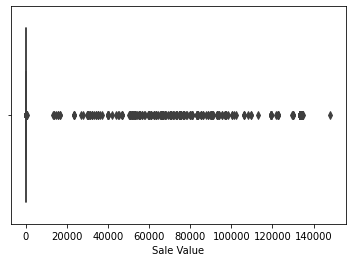

In [132]:
sns.boxplot(booksale_m['Sale Value'])

<AxesSubplot:xlabel='Age'>

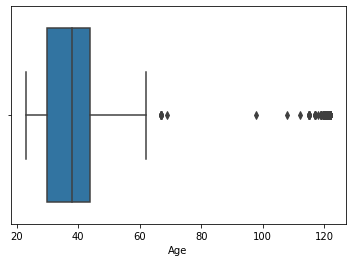

In [136]:
sns.boxplot(booksale_ga['Age'])

In [509]:
# CP2
# Set your output directory. Export output file into your local folder
booksale_m.to_csv(r'C:\Users\Bukhari\Desktop\CDS590 Project\Relevant Data\booksale_c.csv', index = False, header=True)

In [510]:
# CP3
# # Set your output directory. Export output file into your local folder
booksale_ga.to_csv(r'C:\Users\Bukhari\Desktop\CDS590 Project\Relevant Data\booksale_ga.csv', index = False, header=True)

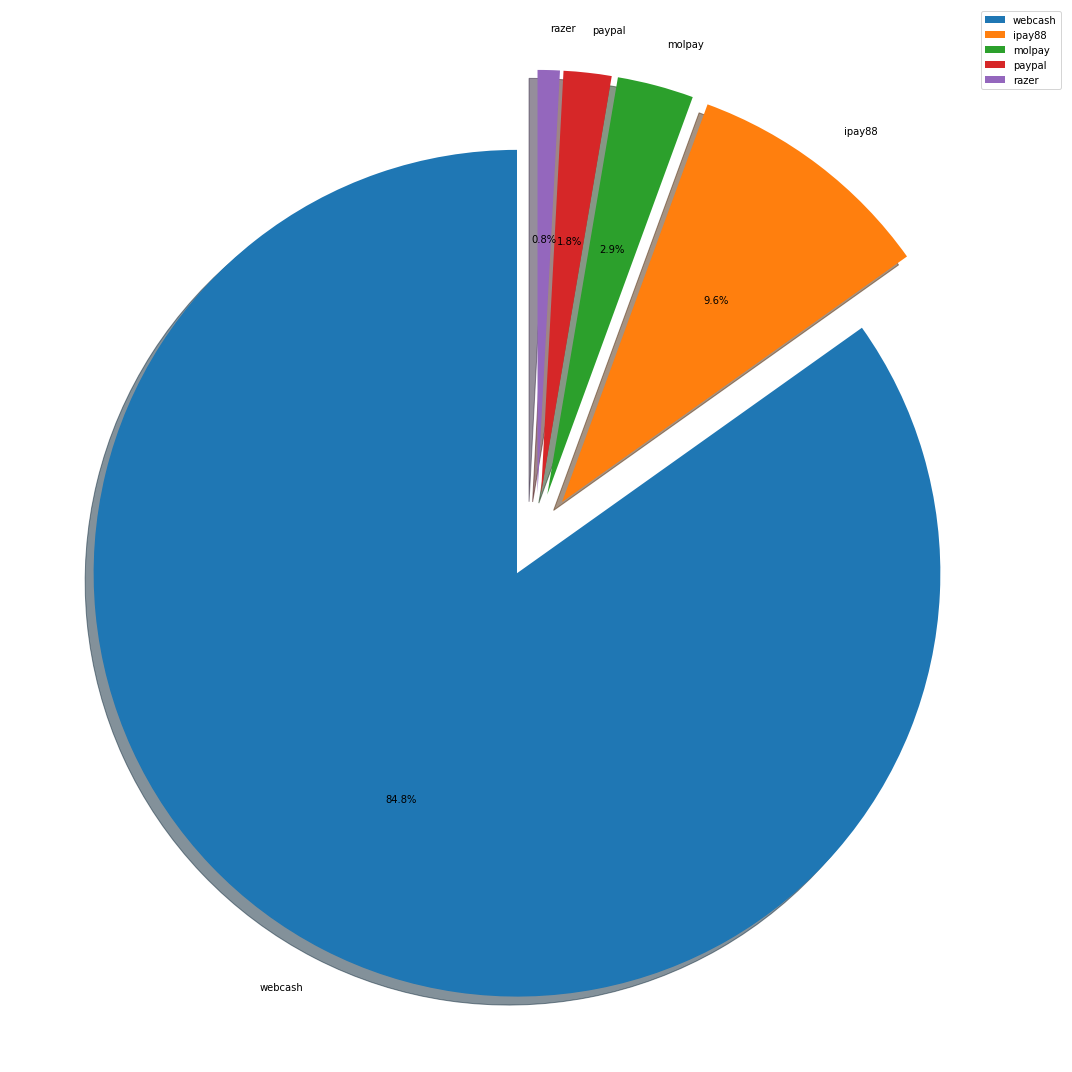

In [217]:
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots(figsize=(15,16))
ax1.pie(booksale['payment_method'].value_counts(),explode=explode, labels=booksale['payment_method'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In [218]:
display(booksale.sample(10))

,site_id,booksale_id,sale_datetime,payment_method,payment_id,book_id,publisher_id,author_id,currency,user_id,sale_amount,ori_amount,qty
49444,1,49637,2019-10-20 16:33:35,molpay,52427,48081,2845,28636,MYR,309285,12.00,12.00,1
79593,1,79788,2020-09-01 14:03:09,molpay,93360,303376,6821,118539,MYR,427802,46.00,46.00,1
37874,1,38066,2019-02-09 07:51:58,molpay,32726,30042,457,23361,MYR,282633,18.99,18.99,1
11287,1,11457,2015-11-04 09:05:57,molpay,11573,55973,2845,28636,MYR,31614,12.00,12.00,1
21278,1,21460,2017-04-28 02:41:51,molpay,7949,96082,5385,47228,MYR,24723,14.00,14.00,1
11295,1,11465,2015-11-04 16:50:30,molpay,11583,55969,2845,31950,MYR,58386,12.00,12.00,1
41785,1,41978,2019-05-27 11:43:26,paypal,39182,269532,7083,108890,MYR,295156,14.00,14.00,1
99524,1,99719,2021-04-08 14:16:52,molpay,117784,271640,7133,110097,MYR,208266,40.00,40.00,1
120691,1,120886,2021-10-26 09:57:46,paypal,144878,303569,6703,33364,MYR,736979,15.00,15.00,1
1806,1,1934,2013-05-02 07:37:06,ipay88,2105,12360,23,11140,MYR,17086,4.73,0.00,1


In [182]:
#booksale[booksale.isnull().any(axis=1)]

In [108]:
#booksale.loc[booksale['sale_amount'] == 0.0]

In [109]:
#booksale = booksale['sale_amount'] >= 0

In [110]:
#booksale[(booksale == 'lazada').any(axis=1)]

In [111]:
#booksale.currency.unique()

In [112]:
#booksale.dtypes

In [146]:
#booksale['sale_datetime'] = booksale['sale_datetime'].astype('datetime64[ns]')
#booksale['sale_datetime'] = pd.to_datetime(booksale['sale_datetime'], format='%y%m%d ')
#booksale["sale_datetime"]= pd.to_datetime(booksale["sale_datetime"], errors='coerce')

#dfx = pd.to_datetime(dfx, format='%d-%m-%Y', errors='coerce')

#booksale['sale_datetime'] = pd.to_datetime(booksale['sale_datetime'])
#booksale[['sale_datetime']] = booksale[['sale_datetime']].apply(pd.to_datetime)
#booksale['sale_datetime'] = booksale['sale_datetime'].astype('datetime64[ns]')

In [113]:
#pp.ProfileReport(booksale)

In [115]:
#print(booksale.keys())